In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Canny_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,110160,106845,110415,108375,182835,149175,107355,82110,107100,48450,...,48195,58395,52785,82110,100470,68085,63750,76500,64260,1
1,159630,184365,178755,190230,198645,147645,147135,151215,183600,148410,...,123675,167025,159630,188445,169575,120615,128775,109650,128775,1
2,327930,202215,208080,259335,216495,157590,193290,264435,154530,135150,...,62985,84915,104040,113730,280500,110160,51510,53295,107610,1
3,68850,39015,35190,25245,65280,85425,81090,59670,70890,42075,...,51765,71910,57630,70890,66810,51510,48195,53040,56355,1
4,128265,60180,28560,22695,79050,93840,70890,60180,34680,33150,...,20400,31620,24225,47430,60435,30600,22695,31875,20145,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8223684210526315
              precision    recall  f1-score   support

          -1       0.90      0.88      0.89       123
           1       0.53      0.59      0.56        29

    accuracy                           0.82       152
   macro avg       0.72      0.73      0.72       152
weighted avg       0.83      0.82      0.83       152



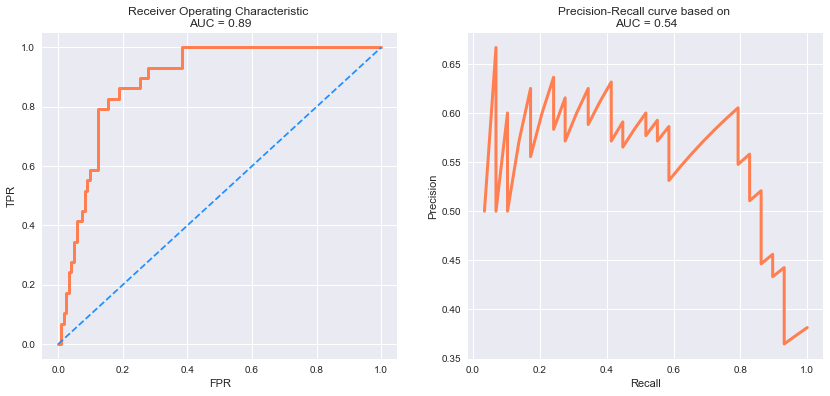

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()